In [290]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [291]:
#loading the dataset
df= pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [293]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [294]:
#dropping unwanted columns
df.drop(['availability','society','area_type','balcony'],axis=1,inplace=True)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [296]:
#handling missing vales in location column
df['location'].value_counts()
df['location']=df['location'].fillna('Whitedield')  #as whitefield has the highest frequency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [297]:
#handling missing values in size column
df['size'].value_counts()
df['size']=df['size'].fillna('2 BHK') #as 2 BHK has the highest repaeted frequency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [298]:
#handling missing values in bath column
df['bath'].value_counts()
df['bath']=df['bath'].fillna(2) #as 2 bathrooms have the highest frequency
df.info()
 #or 
#df['bath']=df['bath'].fillna(df['bath'].median()[0]) #using median to fill missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [299]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [300]:
#cleaning the size coloumn
df['size'].unique()
out=[i.split()[0] for i in df['size']]
df['BHK']=out
df.head()


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [301]:
#convert the BHK column to int
df['BHK']=df['BHK'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   BHK         13320 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 624.5+ KB


In [302]:
#clenaing the total_sqft column
df['total_sqft'].unique()
def convert(a):
    l=a.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(a)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert)
df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   BHK         13320 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 624.5+ KB


In [303]:
#handling missing values in total_sqft column
#df['total_sqft'].value_counts()
#df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median()) #using median to fill missing values
#df.info()

In [304]:
#price per sqft
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']  # formula to calculate price per sqft
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [305]:
#cleaning the location column
df['location']=df['location'].apply(lambda x: x.strip()) # stripping white spaces from the location column
df['location'].value_counts()


location
Whitefield                541
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
Thanisandra               237
                         ... 
Xavier Layout               1
Ramanagara Channapatna      1
Maheswari Nagar             1
Hsr layout sector3          1
Thyagraj Nagar              1
Name: count, Length: 1295, dtype: int64

In [306]:
location_count=df['location'].value_counts()
location_count_less_than_10=location_count[location_count<=10] # filtering locations with less than or equal to 10 occurrences 
location_count_less_than_10

location
1st Block Koramangala     10
Dairy Circle              10
Nagadevanahalli           10
Sadashiva Nagar           10
Naganathapura             10
                          ..
Xavier Layout              1
Ramanagara Channapatna     1
Maheswari Nagar            1
Hsr layout sector3         1
Thyagraj Nagar             1
Name: count, Length: 1054, dtype: int64

In [307]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less_than_10 else x)  # replacing locations with less than or equal to 10 occurrences with 'other'
df['location'].value_counts()

location
other                        2886
Whitefield                    541
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [308]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [309]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+03
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [310]:
df=df[(df['total_sqft']/df['BHK'])>=300 ] # removing rows where total_sqft per BHK is less than 300 
#formula to  calculate total_sqft per BHK

In [311]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [312]:
df=df[df['total_sqft']>=df['BHK']*300] # extra condition to ensure total_sqft is greater than or equal to 300 times the number of BHK alredy applied
# removing rows where total_sqft is less than 300 * BHK
df.describe() # removing rows where total_sqft is less than 300 * BHK

,total_sqft,bath,price,BHK,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<Axes: ylabel='bath'>

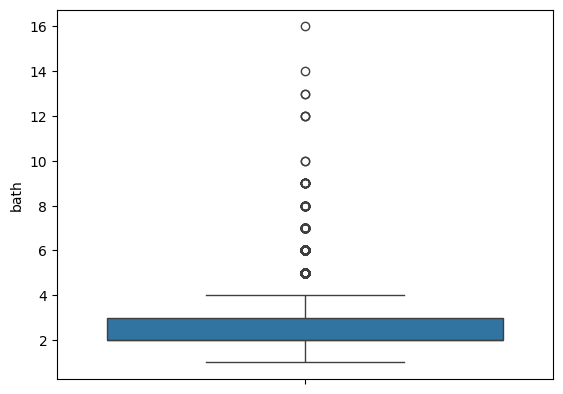

In [313]:
sns.boxplot(y='bath',data=df) # visualizing the distribution of bath column TO CHECK FOR OUTLIERS

<Axes: ylabel='bath'>

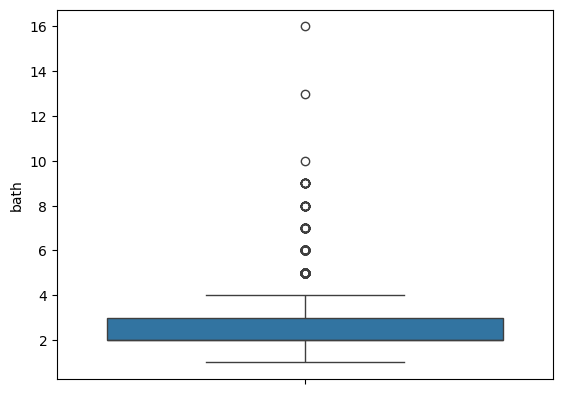

In [314]:
df=df[df['bath']<=df['BHK']] # removing rows where bath is greater than the number of BHK
sns.boxplot(y='bath',data=df) # removing rows where bath is less than half the number of BHK

<Axes: ylabel='BHK'>

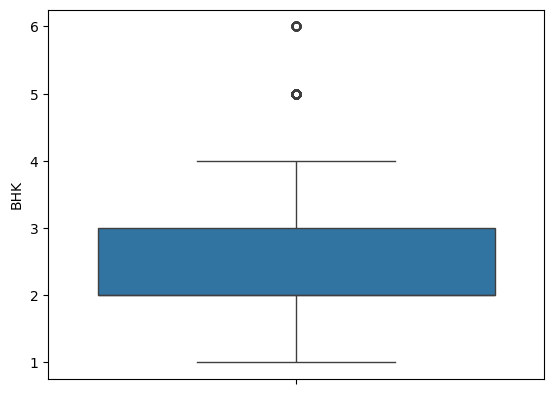

In [315]:
#handling outliers in BHK column
df=df[df['BHK']<=6]
sns.boxplot(y='BHK',data=df) # visualizing the distribution of BHK column TO CHECK FOR OUTLIERS


<Axes: ylabel='price_per_sqft'>

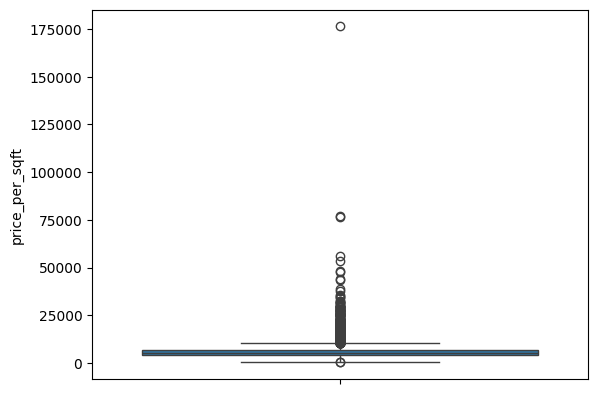

In [316]:
#handling outliers in price_per_sqft column
sns.boxplot(y='price_per_sqft',data=df) # visualizing the distribution of price_per_sqft column TO CHECK FOR OUTLIERS

<Axes: ylabel='price_per_sqft'>

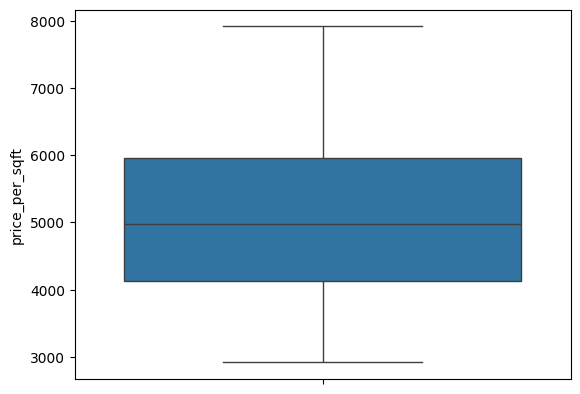

In [317]:
#handling outliers in price_per_sqft column
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-0.5*iqr
upper_bound=q3+0.5*iqr
df=df[(df['price_per_sqft']>=lower_bound)&(df['price_per_sqft']<=upper_bound)] # filtering out the outliers
sns.boxplot(y='price_per_sqft',data=df) # visualizing the distribution of price_per_sqft column after removing outliers

In [318]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [319]:
df=df.drop(['size','price_per_sqft'],axis=1)
df.head()# dropping the size and price_per_sqft columns as they are not required for the model


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [320]:
df.shape

(9522, 5)

In [321]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [322]:
df.reset_index(inplace=True)# resetting the index
df.drop('index',axis=1) # resetting the index and dropping the index column

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Uttarahalli,1440.0,2.0,62.00,3
2,Lingadheeranahalli,1521.0,3.0,95.00,3
3,Kothanur,1200.0,2.0,51.00,2
4,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
9517,Uttarahalli,1345.0,2.0,57.00,3
9518,Green Glen Layout,1715.0,3.0,112.00,3
9519,Whitefield,3453.0,4.0,231.00,5
9520,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [323]:
copied_dataset=df.copy() # creating a copy of the dataset
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['location']=obj.fit_transform(df['location'])
df.head()

,index,location,total_sqft,bath,price,BHK
0,0,78,1056.0,2.0,39.07,2
1,2,225,1440.0,2.0,62.00,3
2,3,158,1521.0,3.0,95.00,3
3,4,150,1200.0,2.0,51.00,2
4,5,234,1170.0,2.0,38.00,2


In [324]:
copied_dataset

,index,location,total_sqft,bath,price,BHK
0,0,Electronic City Phase II,1056.0,2.0,39.07,2
1,2,Uttarahalli,1440.0,2.0,62.00,3
2,3,Lingadheeranahalli,1521.0,3.0,95.00,3
3,4,Kothanur,1200.0,2.0,51.00,2
4,5,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...,...
9517,13313,Uttarahalli,1345.0,2.0,57.00,3
9518,13314,Green Glen Layout,1715.0,3.0,112.00,3
9519,13315,Whitefield,3453.0,4.0,231.00,5
9520,13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [325]:
X=df.drop('price',axis=1) # dropping the price column to create the feature set
y=df['price'] # creating the target variable'


In [326]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42) # splitting the dataset into training and testing sets


In [327]:
model=RandomForestRegressor()  # creating an instance of RandomForestRegressor
params={
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6]
}

In [328]:
grid=GridSearchCV(model,params,cv=5) # creating an instance of GridSearchCV to find the best hyperparameters for the RandomForestRegressor
grid.fit(Xtrain,ytrain) # fitting the GridSearchCV on the training set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [329]:
print('training efficemcy:',grid.score(Xtrain,ytrain)) # printing the training efficacy of the model
print('testing efficacy:',grid.score(Xtest,ytest)) # printing the training and testing efficacy of the model

training efficemcy: 0.8656038176332913
testing efficacy: 0.8217373848719581


In [331]:
import pickle
with open('model.pkl','wb') as f: # saving the trained RandomForestRegressor model as a pickle file
    pickle.dump(grid.best_estimator_,f)
    print('model saved successfully') 

model saved successfully
